In [80]:
import numpy as np
import matplotlib.pyplot as plt

# Dados

In [81]:
dados = np.random.normal(1, 0.5, [100,2])
dados.shape

X = np.vstack([np.random.normal(1, 0.5, [100,2]),
                  np.random.normal(-2, 1, [100,2]),
                  np.random.normal(3, 0.75, [100,2])]
                  )
y = np.hstack([np.zeros(100, dtype=int),
               np.ones(100, dtype=int),
               np.ones(100, dtype=int) + 1])

print(y.shape)

print(X.shape)

(300,)
(300, 2)


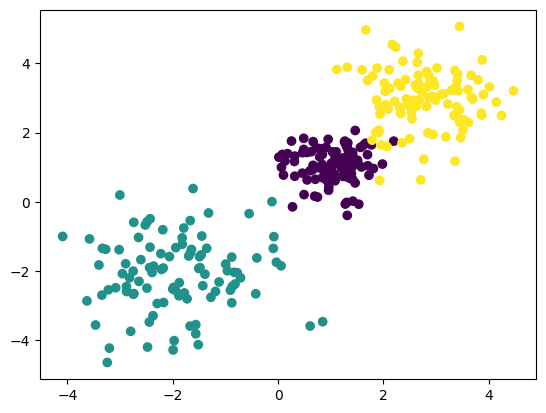

In [82]:
plt.scatter(X[:,0], X[:,1], c = y)

In [83]:
# notação one-hot
def one_hot(y):
  one_hot_y = np.zeros((len(np.unique(y)),y.size))
  one_hot_y[y,np.arange(y.size)] = 1
  return one_hot_y

print(y)
y = one_hot(y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 

In [84]:
# sortear e dividir
ordem = np.random.permutation(X.shape[0])

n_train = int(0.8*X.shape[0]) # 80% dos dados para treino

y_train = y[:,ordem[:n_train]]
X_train = X[ordem[:n_train]]

y_test = y[:,ordem[n_train:]]
X_test = X[ordem[n_train:]]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(240, 2)
(3, 240)
(60, 2)
(3, 60)


# Forward

In [85]:
# rede de 1 camada oculta
def init_params():
  # camada inicial
  #                  2 att, 10 neuronios
  W1 = np.random.rand(2, 10) - 0.5 # distr uniforme
  b1 = np.random.rand(1, 10) - 0.5
  # camada oculta
  #                  10 att, 3 neuronios de saída
  W2 = np.random.rand(10, 3) - 0.5
  b2 = np.random.rand(1, 3) - 0.5

  return W1, b1, W2, b2

# da pra testar com ReLU tbm
def ativacao(Z):
  return 1 / (1 + np.exp(-Z))

def softmax(Z):
  return np.exp(Z) / sum(np.exp(Z))

# tratar os shapes
def forward(X, W1, b1, W2, b2):
  O1 = np.dot(X, W1) + b1
  A1 = ativacao(O1)

  O2 = np.dot(A1, W2) + b2
  A2 = softmax(O2.T)

  return O1, A1, O2, A2

In [86]:
W1, b1, W2, b2 = init_params()
O1, A1, O2, A2 = forward(X_train, W1, b1, W2, b2)

In [87]:
print(X_train.shape)
print(W1.shape)
print(b1.shape)
print(W2.shape)
print(b2.shape)
print(O1.shape)
print(A1.shape)
print(O2.shape)
print(A2.shape)

(240, 2)
(2, 10)
(1, 10)
(10, 3)
(1, 3)
(240, 10)
(240, 10)
(240, 3)
(3, 240)


# Backward

In [88]:
def deriv(Z):
  f = ativacao(Z)
  return f * (1-f)

def backward(O1, A1, O2, A2, W1, W2, X, y):

  n = y.size
  err = 2 * (A2 - y)

  dW2 = np.dot(err, A1) / n
  db2 = np.sum(err, axis=1) / n

  err1 = np.dot(W2, err) * deriv(O1.T)

  dW1 = np.dot(err1, X) / n
  db1 = np.sum(err1, axis=1) / n

  return dW1, db1, dW2, db2

def adjust_params(W1, b1, W2, b2, dW1, db1, dW2, db2, lr = 0.1):
  W1 -= lr * dW1.T
  b1 -= lr * db1.T
  W2 -= lr * dW2.T
  b2 -= lr * db2.T

  return W1, b1, W2, b2

In [89]:
def get_preds(y):
  return np.argmax(y, axis=0)

def get_accuracy(y_hat, y):
  return np.sum(y_hat == y) / y.size

# fazer um from_scratch = True, para nao começar do 0 toda vez que rodar
def fit(X, y, lr = 0.01, n_epochs = 100):

  W1, b1, W2, b2 = init_params()

  for i in range(n_epochs):
    O1, A1, O2, A2 = forward(X_train, W1, b1, W2, b2)
    dW1, db1, dW2, db2 = backward(O1, A1, O2, A2, W1, W2, X_train, y_train)
    W1, b1, W2, b2 = adjust_params(W1, b1, W2, b2, dW1, db1, dW2, db2, lr=lr)

    if (i % 10 == 0):
      print("Epoch: ", i)
      y_pred = get_preds(y)
      y_hat = get_preds(A2)
      print("Loss: ", np.mean(np.square(y-A2)))
      print("Acc:", get_accuracy(y_hat, y_pred))

  return W1, b1, W2, b2

def predict(X, W1, b1, W2, b2):
  O1, A1, O2, A2 = forward(X, W1, b1, W2, b2)
  return get_preds(A2)

# Treinamento e teste

In [90]:
W1, b1, W2, b2 = fit(X_train, y_train, lr = 0.05, n_epochs = 200)

Epoch:  0
Loss:  0.20271310593122924
Acc: 0.625
Epoch:  10
Loss:  0.18804347543154673
Acc: 0.6458333333333334
Epoch:  20
Loss:  0.17672749369053073
Acc: 0.65
Epoch:  30
Loss:  0.16747213861594354
Acc: 0.8916666666666667
Epoch:  40
Loss:  0.15956632625827483
Acc: 0.6833333333333333
Epoch:  50
Loss:  0.15264224350961578
Acc: 0.6833333333333333
Epoch:  60
Loss:  0.1465026191630708
Acc: 0.6833333333333333
Epoch:  70
Loss:  0.14102630754702825
Acc: 0.6833333333333333
Epoch:  80
Loss:  0.1361251637406839
Acc: 0.6833333333333333
Epoch:  90
Loss:  0.13172662821696707
Acc: 0.6833333333333333
Epoch:  100
Loss:  0.12776738936584892
Acc: 0.6833333333333333
Epoch:  110
Loss:  0.12419127603193009
Acc: 0.6833333333333333
Epoch:  120
Loss:  0.12094853351108037
Acc: 0.6875
Epoch:  130
Loss:  0.11799542186058057
Acc: 0.7
Epoch:  140
Loss:  0.11529380320517413
Acc: 0.7083333333333334
Epoch:  150
Loss:  0.11281065516707779
Acc: 0.7166666666666667
Epoch:  160
Loss:  0.11051753303562559
Acc: 0.7333333333333

In [91]:
y_hat = predict(X_test, W1, b1, W2, b2)
print(get_accuracy(y_hat, get_preds(y_test)))

0.7333333333333333
